In [304]:
# Dataset used ----      
# https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [254]:
import pandas as pd
import numpy as np
data = pd.read_csv("Housing.csv")

In [255]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [256]:
data.shape

(13320, 9)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [258]:
# Lets see what is available in every column 
for column in data.columns:
    print(data[column].value_counts())
    print("----------------")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
----------------
size
2 BHK         5199
3 

In [259]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [260]:
# drop unneccesary columns 
data.drop(columns=['area_type','availability','society','balcony','location'],inplace=True)     # drop unnecessary columns

In [261]:
data.columns

Index(['size', 'total_sqft', 'bath', 'price'], dtype='object')

In [262]:
data.isnull().sum()

size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [263]:
data.head()

,size,total_sqft,bath,price
0,2 BHK,1056,2.0,39.07
1,4 Bedroom,2600,5.0,120.00
2,3 BHK,1440,2.0,62.00
3,3 BHK,1521,3.0,95.00
4,2 BHK,1200,2.0,51.00


In [264]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   price       13320 non-null  float64
dtypes: float64(2), object(2)
memory usage: 416.4+ KB


In [266]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [267]:
data['size']=data['size'].fillna('2 BHK')  # fill null values

In [268]:
data['bath']=data['bath'].fillna(data['bath'].median())  # fill null values with median

In [269]:
data['bhk']=data['size'].str.split().str.get(0).astype(int) # convert string to int

In [270]:
data[data.bhk>20]   #outliers

,size,total_sqft,bath,price,bhk
1718,27 BHK,8000,27.0,230.0,27
4684,43 Bedroom,2400,40.0,660.0,43


In [271]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [272]:
def change(x):
    A=x.split('-')
    if len(A) == 2:
        return(float(A[0])+float(A[1]))/2
    try:
        return float(x)
    except:
        return None

In [273]:
data['total_sqft']=data['total_sqft'].apply(change)

In [274]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [275]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            13320 non-null  object 
 1   total_sqft      13274 non-null  float64
 2   bath            13320 non-null  float64
 3   price           13320 non-null  float64
 4   bhk             13320 non-null  int32  
 5   price_per_sqft  13274 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 572.5+ KB


In [277]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [278]:
data=data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [279]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [280]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('bhk'):
        
        m=np.mean(subdf.price_per_sqft)   # mean
        st=np.std(subdf.price_per_sqft)   # standard deviation
        
        gen_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output 
data = remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000
mean,1551.016256,2.539274,93.939288,2.634135,5613.030093
std,967.129388,1.053228,90.318382,0.963911,2021.816323
min,300.000000,1.000000,9.000000,1.000000,573.921028
25%,1113.120000,2.000000,50.000000,2.000000,4271.844660
50%,1300.000000,2.000000,67.000000,3.000000,5185.185185
75%,1685.000000,3.000000,100.000000,3.000000,6390.977444
max,30400.000000,14.000000,2100.000000,11.000000,18355.359765


In [281]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('bath'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index') 

In [282]:
data=bhk_outlier_remover(data)

In [283]:
data.shape

(5232, 6)

In [284]:
data

,size,total_sqft,bath,price,bhk,price_per_sqft
0,1 BHK,600.0,1.0,15.00,1,2500.000000
1,1 RK,510.0,1.0,25.25,1,4950.980392
2,1 BHK,600.0,1.0,38.00,1,6333.333333
3,1 Bedroom,660.0,1.0,48.00,1,7272.727273
4,1 BHK,450.0,1.0,11.00,1,2444.444444
...,...,...,...,...,...,...
10600,10 BHK,4000.0,12.0,160.00,10,4000.000000
10601,10 Bedroom,3300.0,9.0,450.00,10,13636.363636
10602,10 Bedroom,7200.0,10.0,200.00,10,2777.777778
10603,10 Bedroom,3280.0,9.0,450.00,10,13719.512195


In [285]:
# now we saw that dataset is clean and now we no need of price per sqft so remove it 
data.drop(columns=["price_per_sqft","size"],inplace=True)

In [286]:
data.head()

,total_sqft,bath,price,bhk
0,600.0,1.0,15.00,1
1,510.0,1.0,25.25,1
2,600.0,1.0,38.00,1
3,660.0,1.0,48.00,1
4,450.0,1.0,11.00,1


In [287]:
data.tail()

,total_sqft,bath,price,bhk
10600,4000.0,12.0,160.0,10
10601,3300.0,9.0,450.0,10
10602,7200.0,10.0,200.0,10
10603,3280.0,9.0,450.0,10
10604,5000.0,9.0,360.0,11


In [288]:
data.to_csv("cleaned_house_data.csv")  #save the data

In [289]:
x = data.drop(columns=['price'])
y = data['price']

In [290]:
# import libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [291]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=36)

In [292]:
print(x_train.shape)
print(y_train.shape)

(4185, 3)
(4185,)


In [293]:
scaler = StandardScaler()

In [294]:
LR = LinearRegression()

In [295]:
pipe_lin = make_pipeline(scaler,LR)

In [296]:
pipe_lin.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [297]:
y_predict = pipe_lin.predict(x_test)

In [298]:
r2_score(y_test,y_predict)

0.7917166495744102

ValueError: x and y must be the same size

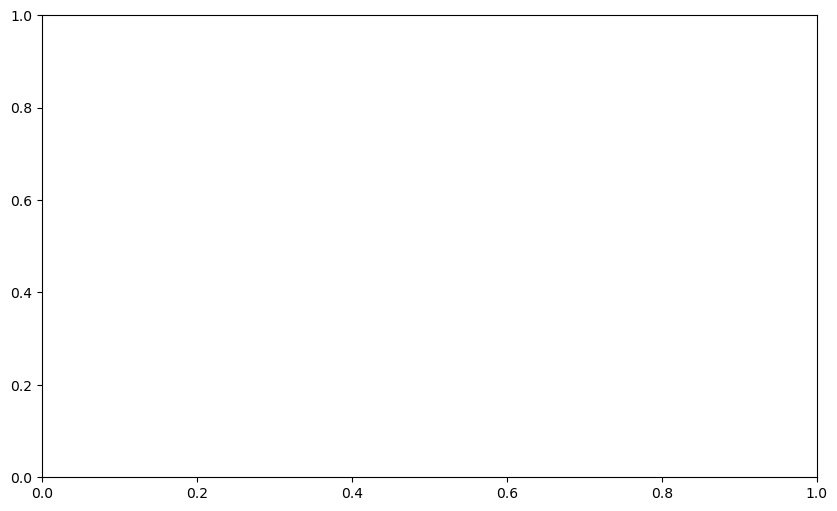

In [299]:
reg_score = r2_score(y_test , y_predict)
print('R squared of linear regression :',reg_score)

p = len(x_train.iloc[:,0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
print('Adjacent R squared of linear regression : ',adj_R2)

mape = mean_absolute_percentage_error(y_test , y_predict)
print("Mean  absolute precentage error of linear regression (MAPE) : ",mape*100,'%')

reg_mae = mean_absolute_error(y_test , y_predict)
print("Mean  absolute error of linear regression (MAE): ",reg_mae)

mse = mean_squared_error(y_test , y_predict)
print("Mean  Squared error of linear regression (MSE): ",mse)

rmse = np.sqrt((mean_squared_error(y_test , y_predict)))
print("Mean  Squared error of linear regression (RMSE): ",rmse)


R squared of linear regression : 0.7917166495744102
Adjacent R squared of linear regression :  872.4575381806676
Mean  absolute precentage error of linear regression (MAPE) :  23.573852103916735 %
Mean  absolute error of linear regression (MAE):  27.53998266768482
Mean  Squared error of linear regression (MSE):  2707.641785668503
Mean  Squared error of linear regression (RMSE):  52.035005387416874


In [300]:
data.columns

Index(['total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [301]:
import numpy as np
import pandas as pd

def predict_price(total_sqft, bath, bhk):
    new_row = np.zeros(3)
    new_row[0] = total_sqft
    new_row[1] = bath
    new_row[2] = bhk

    # Convert the numpy array to a DataFrame for prediction
    new_row_df = pd.DataFrame([new_row], columns=['total_sqft', 'bath', 'bhk'])
    
    return pipe_lin.predict(new_row_df)

In [302]:
predict_price(3333,3,3)

array([252.32480515])

In [303]:
print("price of the house is " ,round(predict_price(3333,3,3)[0],2))

price of the house is  252.32
